In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print(train_data.shape, test_data.shape)

(891, 12) (418, 11)


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [5]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train_data.Pclass.value_counts()
#Pclass -> Ticket Class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
train_data.Name[:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

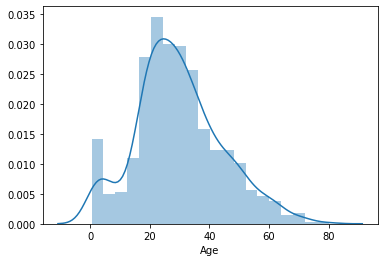

In [11]:
sns.distplot(a = train_data.Age)

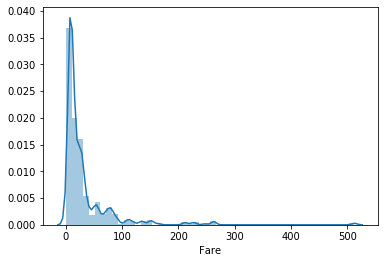

In [12]:
sns.distplot(a = train_data.Fare)

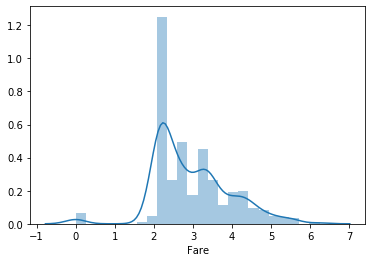

In [15]:
sns.distplot(np.log(train_data.Fare+1))

In [14]:
train_data.Survived.groupby([train_data.Pclass, train_data.Survived]).count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
train_data.Survived.groupby([train_data.Sex, train_data.Survived]).count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [19]:
train_data.Survived.groupby([train_data.Embarked, train_data.Survived]).count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [20]:
# SibSp -> no of siblings present
# Parch -> parent/children present

train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [21]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [22]:
train_data['Relatives'] = train_data.Parch + train_data.SibSp

In [23]:
train_data.Relatives.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Relatives, dtype: int64

In [24]:
train_data.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F33            3
              ..
C85            1
F E69          1
B73            1
A36            1
A31            1
Name: Cabin, Length: 147, dtype: int64

In [28]:
train_data.Ticket.nunique()

681

In [25]:
# Missing Values

mean = train_data.Age.mean()
train_data.Age.replace(np.nan, mean, inplace = True)
train_data.Embarked.replace(np.nan, 'S', inplace = True)
train_data.Cabin.replace(np.nan, 'No', inplace = True)

In [26]:
for i in range(0, len(train_data)):
    if(train_data.Cabin[i] != 'No'):
        train_data.Cabin[i] = 'Yes'

C:\Users\PIYUSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S,0


## Model Development

In [30]:
X_train = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'SibSp', 'Parch'], axis = 1)

In [31]:
y_train = train_data.Survived

In [32]:
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives
0,3,male,22.0,7.2500,No,S,1
1,1,female,38.0,71.2833,Yes,C,1
2,3,female,26.0,7.9250,No,S,0
3,1,female,35.0,53.1000,Yes,S,1
4,3,male,35.0,8.0500,No,S,0


In [33]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
X_train.Fare = np.log(X_train.Fare + 1)

In [35]:
label_encoding_dict = {'male':0, 'female':1, 'Yes':1, 'No':0, 'S':0, 'C':1, 'Q':2}

In [40]:
X_train.Sex = X_train.Sex.map(label_encoding_dict)
X_train.Embarked = X_train.Embarked.map(label_encoding_dict)
X_train.Cabin = X_train.Cabin.map(label_encoding_dict)

In [41]:
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Relatives
0,3,0,22.0,2.110213,0,0,1
1,1,1,38.0,4.280593,1,1,1
2,3,1,26.0,2.188856,0,0,0
3,1,1,35.0,3.990834,1,0,1
4,3,0,35.0,2.202765,0,0,0


In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
classifier.feature_importances_

array([0.0724195 , 0.22121214, 0.28599456, 0.27554483, 0.03764704,
       0.03731118, 0.06987074])

In [ ]:
#All the features seem to be important

In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X = X_train, y = y_train, cv = 5)
accuracies.mean()

0.8058313979034587

In [46]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

In [47]:
accuracies = cross_val_score(xgb_classifier, X = X_train, y = y_train, cv = 5)
accuracies.mean()

0.8283095850856821

In [48]:
# One hot encoding the features for Linear and SVM Model

def encoding(dataset, feature_to_encode):
    dummies = pd.get_dummies(dataset[feature_to_encode], drop_first = True)
    dataset = dataset.drop([feature_to_encode], axis = 1)
    dataset = pd.concat([dataset, dummies], axis = 1)
    return dataset

X_train = encoding(X_train, 'Pclass')
X_train = encoding(X_train, 'Embarked')

In [49]:
X_train.head()

,Sex,Age,Fare,Cabin,Relatives,2,3,1,2
0,0,22.0,2.110213,0,1,0,1,0,0
1,1,38.0,4.280593,1,1,0,0,1,0
2,1,26.0,2.188856,0,0,0,1,0,0
3,1,35.0,3.990834,1,1,0,0,0,0
4,0,35.0,2.202765,0,0,0,1,0,0


In [50]:
X_train.dtypes

Sex            int64
Age          float64
Fare         float64
Cabin          int64
Relatives      int64
2              uint8
3              uint8
1              uint8
2              uint8
dtype: object

In [52]:
X_train[2] = X_train[2].astype('int64')
X_train[1] = X_train[1].astype('int64')
X_train[3] = X_train[3].astype('int64')

In [54]:
X_train.head()

,Sex,Age,Fare,Cabin,Relatives,2,3,1,2
0,0,22.0,2.110213,0,1,0,1,0,0
1,1,38.0,4.280593,1,1,0,0,1,0
2,1,26.0,2.188856,0,0,0,1,0,0
3,1,35.0,3.990834,1,1,0,0,0,0
4,0,35.0,2.202765,0,0,0,1,0,0


In [55]:
from sklearn.linear_model import LogisticRegression
linear_classifier = LogisticRegression(random_state = 0)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)

In [60]:
X_train_sc[1]

array([ 1.35557354,  0.63878901,  1.36121993,  1.835115  ,  0.05915988,
       -0.51015154, -1.10792599,  2.0745051 , -0.30756234])

In [62]:
accuracies = cross_val_score(linear_classifier, X = X_train_sc, y = y_train, cv = 5)
accuracies.mean()

0.7991023790094783

In [63]:
accuracies = cross_val_score(svm_classifier, X = X_train_sc, y = y_train, cv = 5)
accuracies.mean()

0.8159374803841567

In [ ]:
# Best Accuracy -> SVM Classifier, XGB Classifier